In [3]:
!pip install scikit-learn

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
%matplotlib inline
import warnings 
warnings.simplefilter("ignore")
# from skleran.dataset import load_boston
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [5]:
column_name=['CARN,ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
boston_data=pd.read_csv("C:\\Users\\Rahul\\Downloads\\housing.csv",header=None, delimiter=r"\s+", names=column_name)


In [6]:
boston_data

,"CARN,ZN",INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [7]:
boston_data.shape

(506, 13)

In [8]:
boston_data.head()

,"CARN,ZN",INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
boston_data.tail()

,"CARN,ZN",INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [10]:
boston_data.dtypes

CARN,ZN    float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [11]:
# DESCRIBE
# gives statistical summary

boston_data.describe()

,"CARN,ZN",INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
# Note:

# If you omit the parentheses, like this:

# boston_data.describe

# You're not actually executing the method; you're simply referencing it. 
# This won't give you the statistical summary; it will just return information about the method itself.


# So, always remember to include parentheses when you're calling a method or a function in Python.

In [13]:
# isnull()
# shows null values

boston_data.isnull()

,"CARN,ZN",INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0.00632,False,False,False,False,False,False,False,False,False,False,False,False,False
0.02731,False,False,False,False,False,False,False,False,False,False,False,False,False
0.02729,False,False,False,False,False,False,False,False,False,False,False,False,False
0.03237,False,False,False,False,False,False,False,False,False,False,False,False,False
0.06905,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.06263,False,False,False,False,False,False,False,False,False,False,False,False,False
0.04527,False,False,False,False,False,False,False,False,False,False,False,False,False
0.06076,False,False,False,False,False,False,False,False,False,False,False,False,False
0.10959,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
boston_data.corr()

,"CARN,ZN",INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
"CARN,ZN",1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
PTRATIO,-0.391679,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787


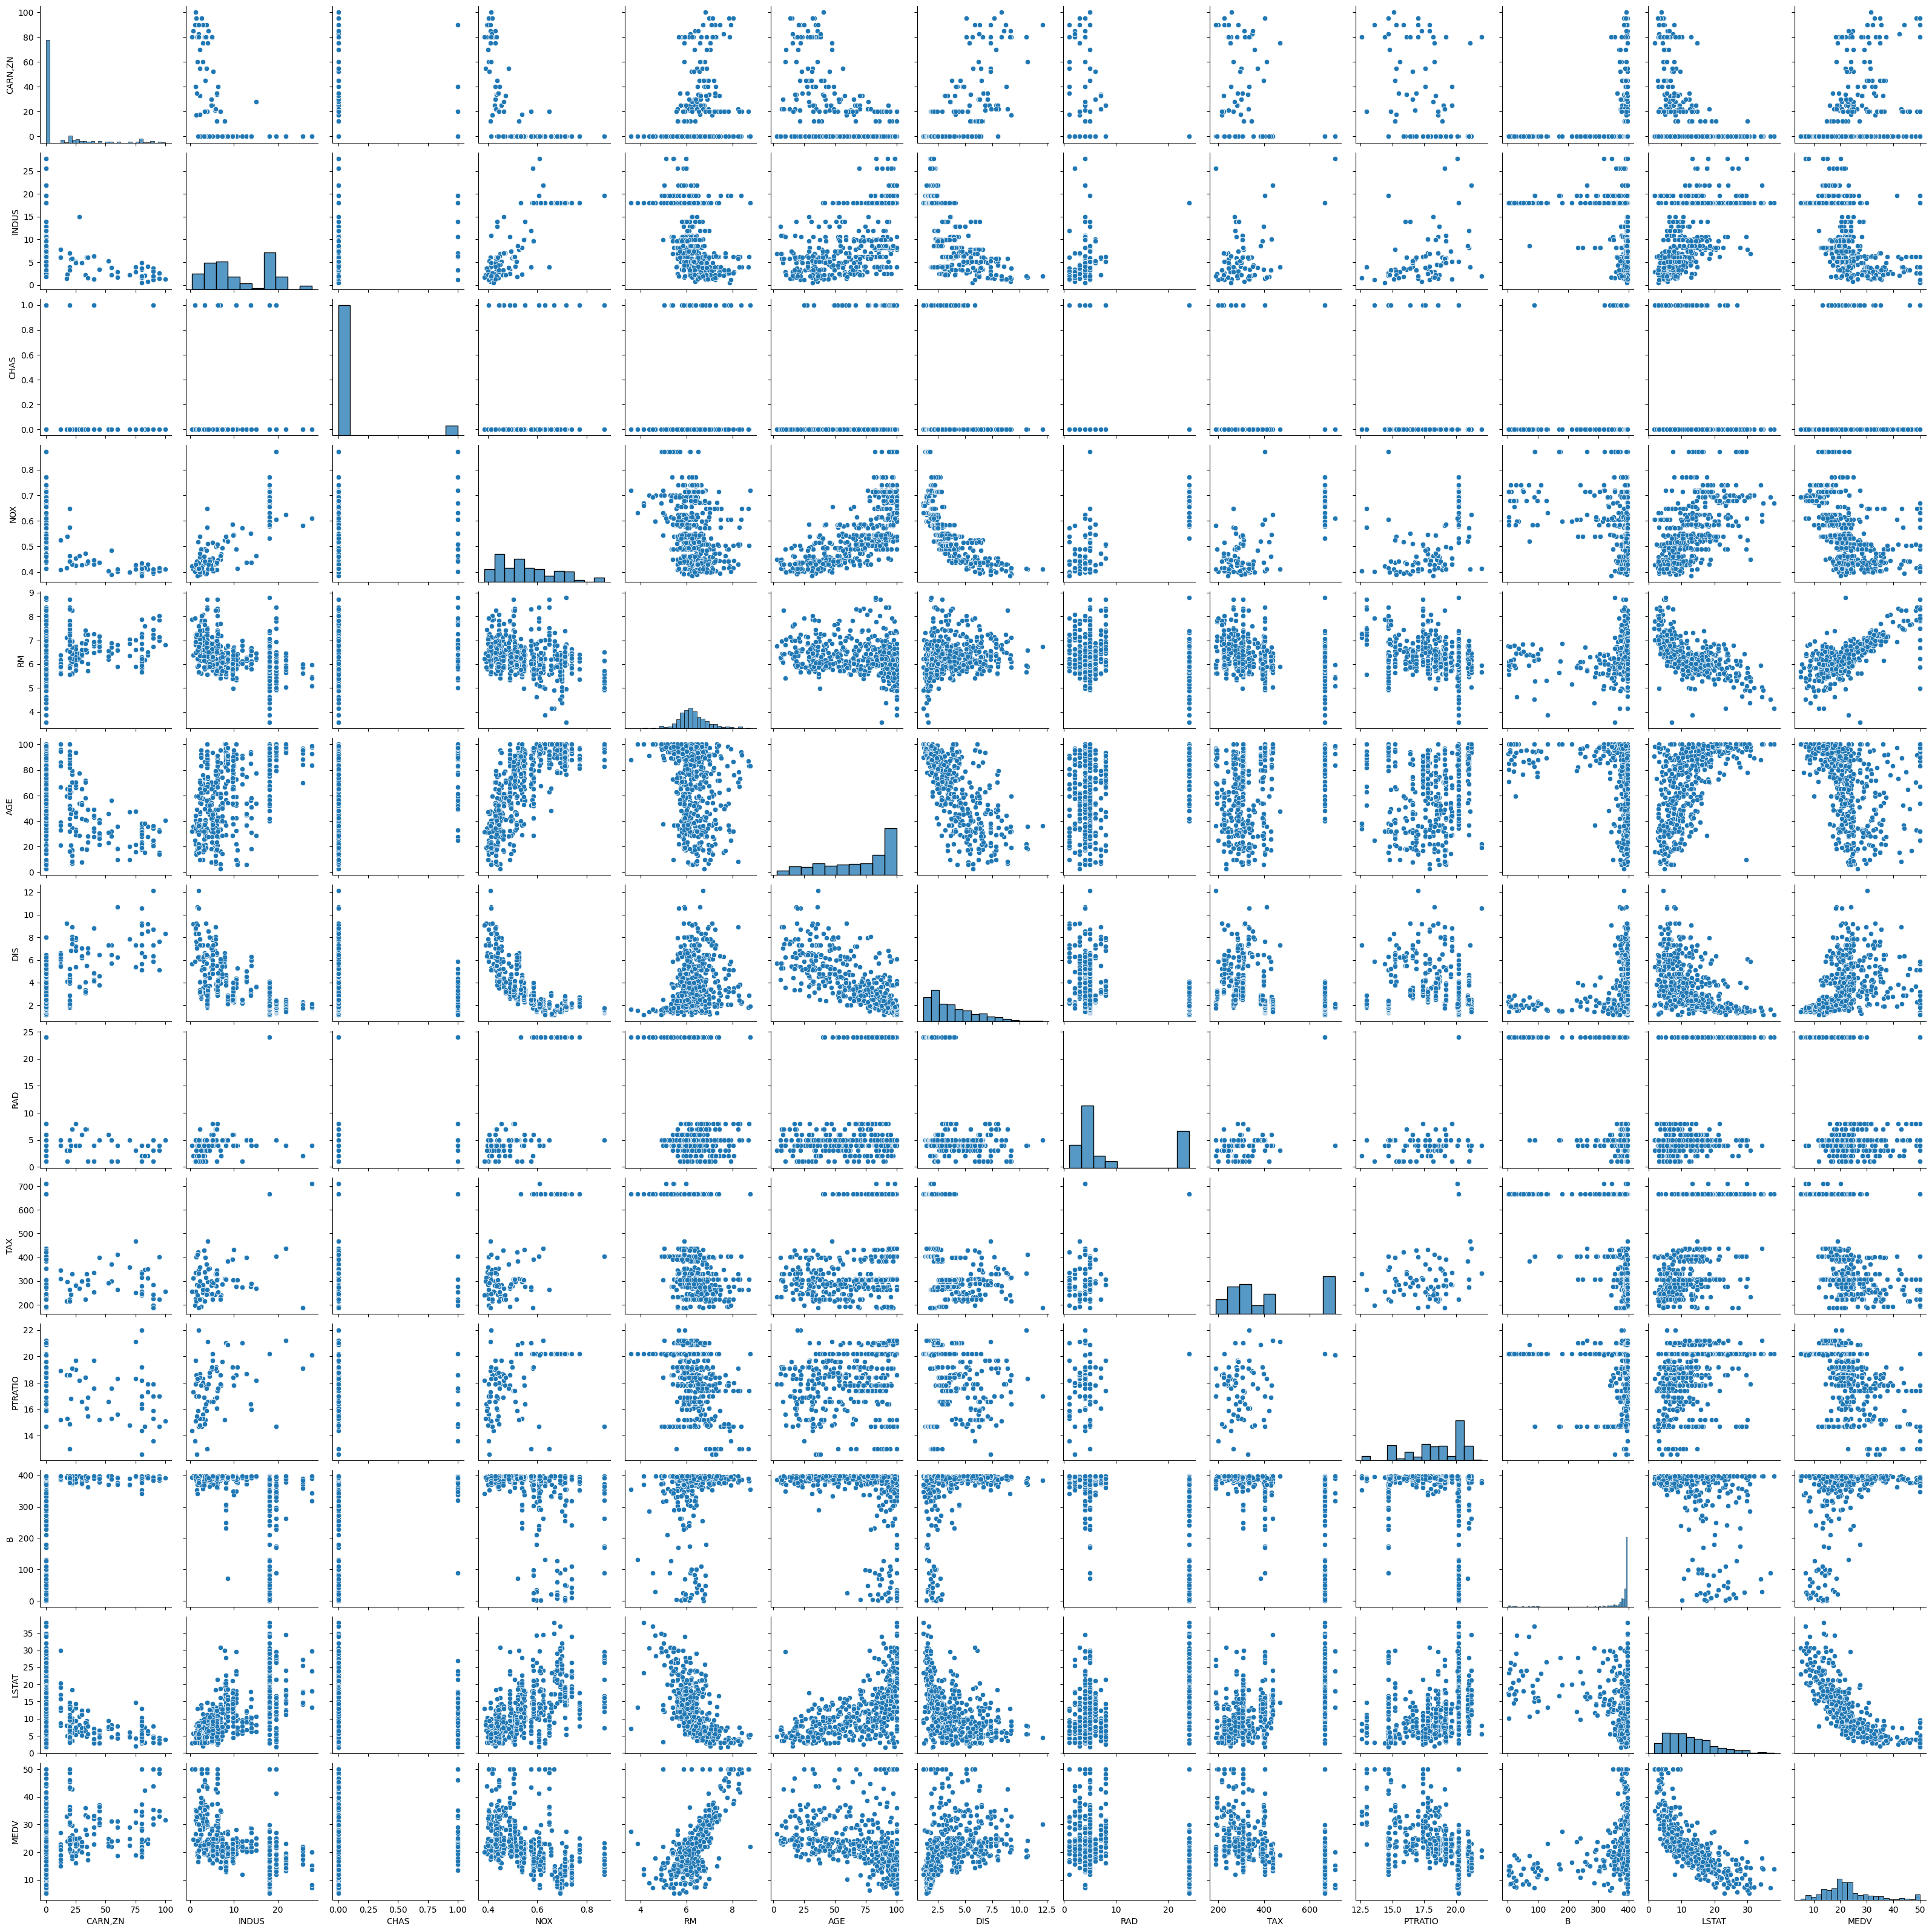

In [15]:
sns.pairplot(boston_data)

<Axes: xlabel='RM', ylabel='MEDV'>

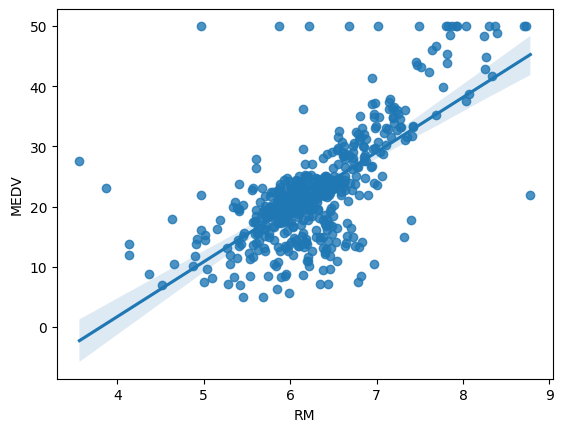

In [16]:
import seaborn as sns
import pandas as pd

# Assuming you have loaded your Boston housing dataset into a DataFrame named boston_data
# For demonstration purposes, let's assume you want to visualize the relationship between 'RM' (average number of rooms) and 'MEDV' (median value of owner-occupied homes)

sns.regplot(x='RM', y='MEDV', data=boston_data)


<Axes: ylabel='Count'>

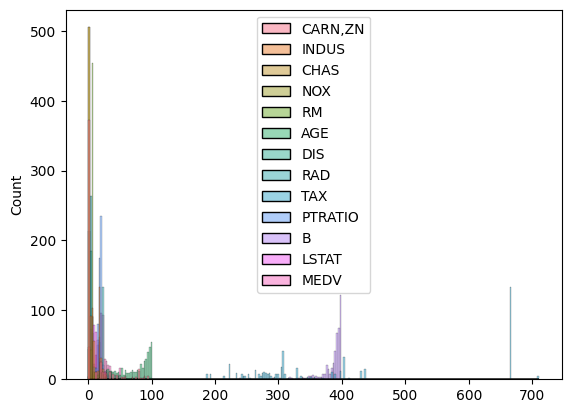

In [17]:
sns.histplot(boston_data)

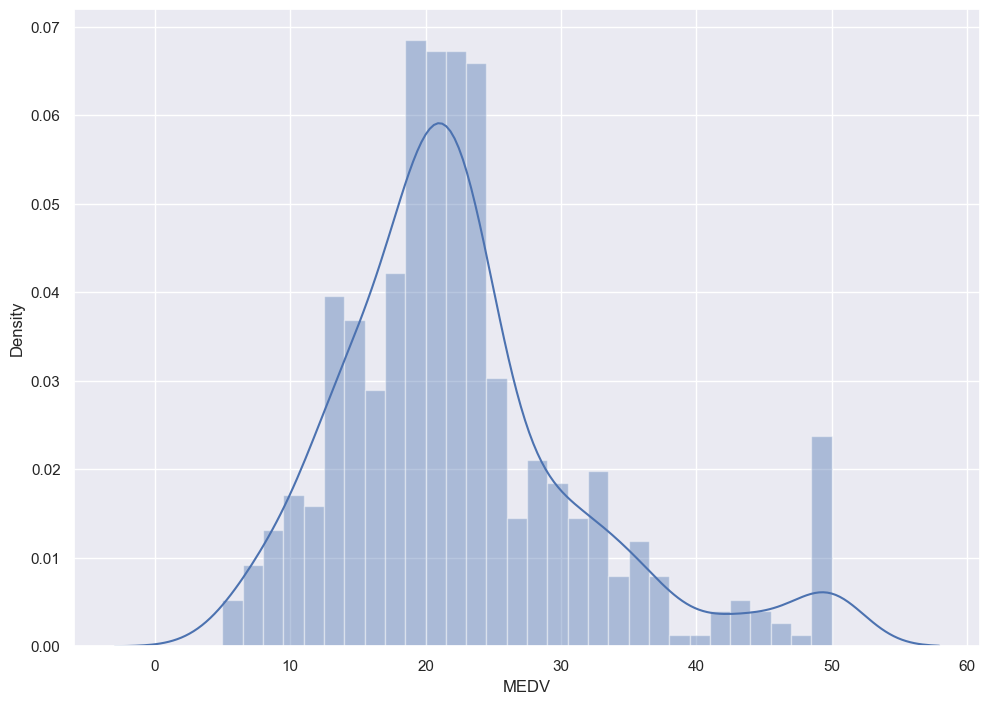

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_data["MEDV"],bins=30)
plt.show()

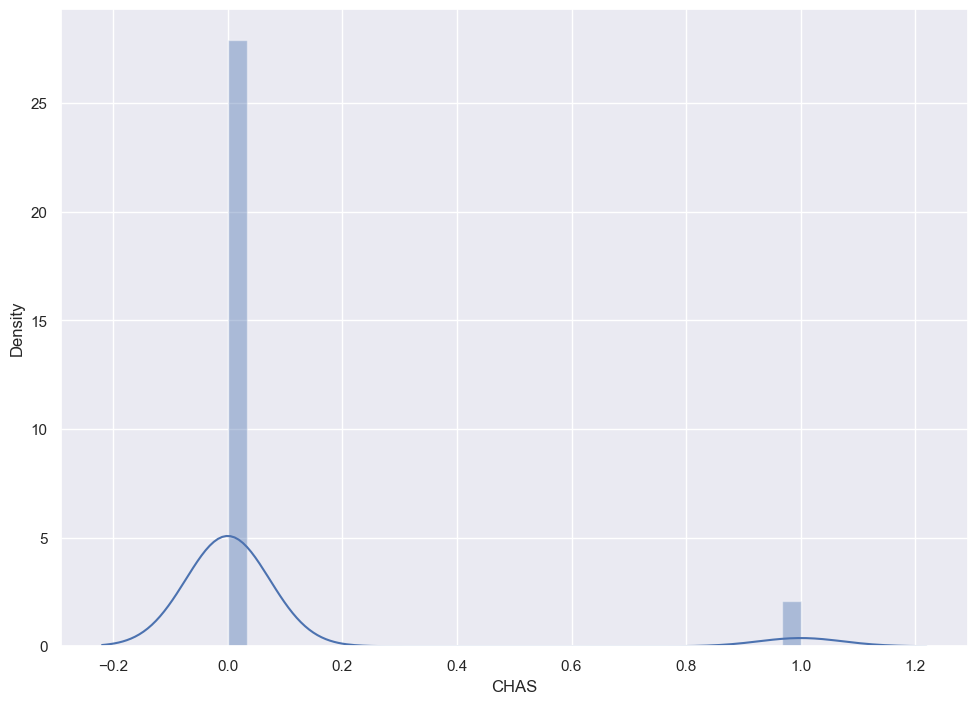

In [19]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_data['CHAS'],bins=30)
plt.show()

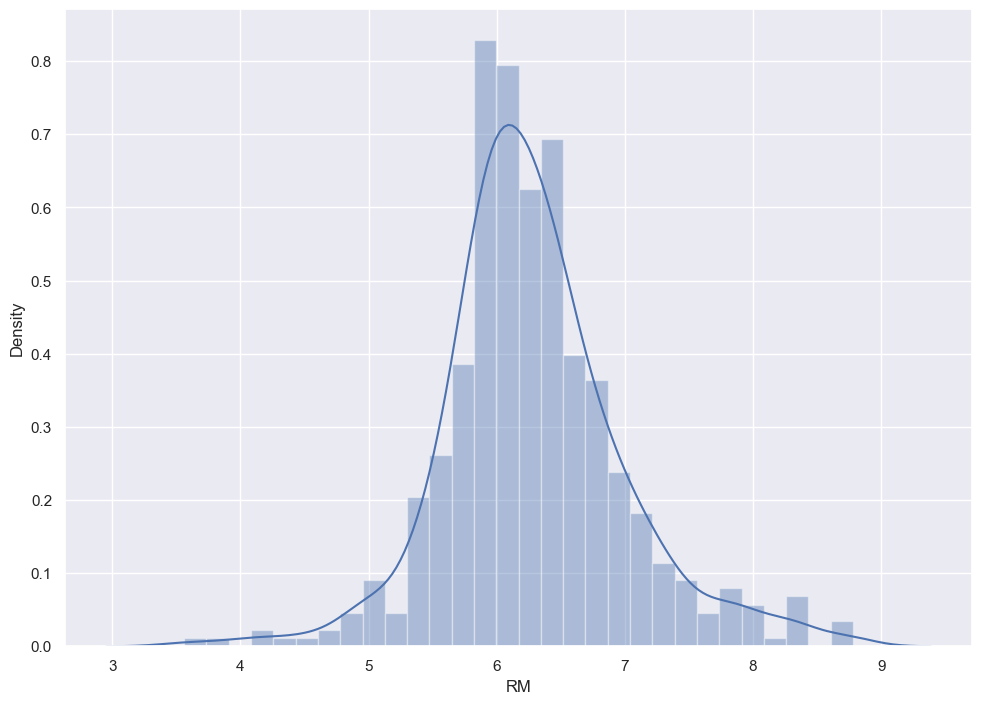

In [20]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_data['RM'],bins=30)
plt.show()

<Axes: >

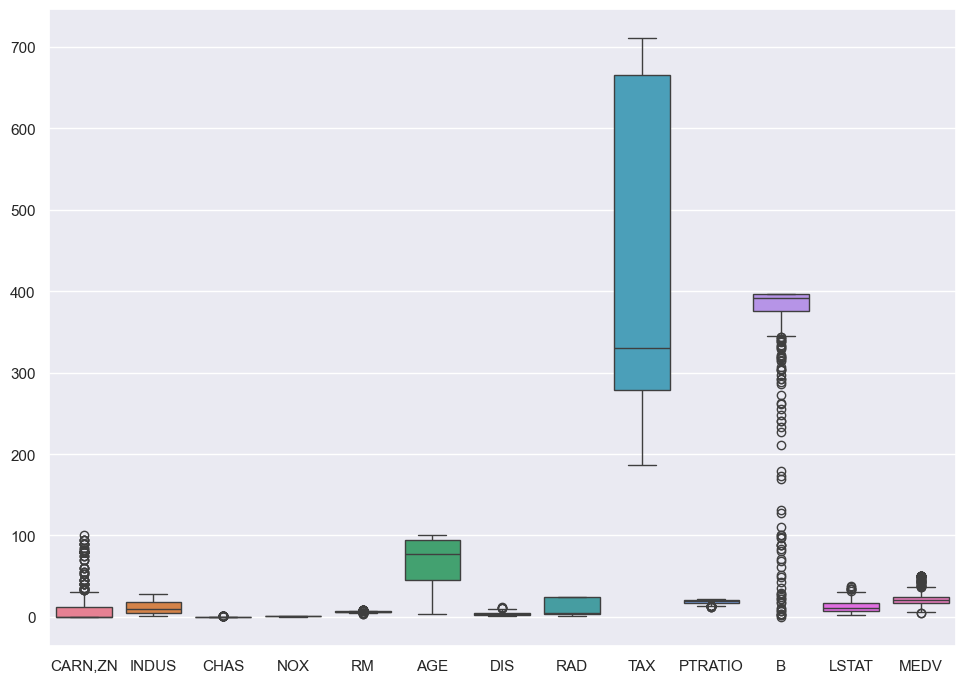

In [21]:
 sns.boxplot(boston_data)

In [22]:
correlation_matrix = boston_data.corr()
correlation_matrix

,"CARN,ZN",INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
"CARN,ZN",1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
PTRATIO,-0.391679,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787


<Axes: >

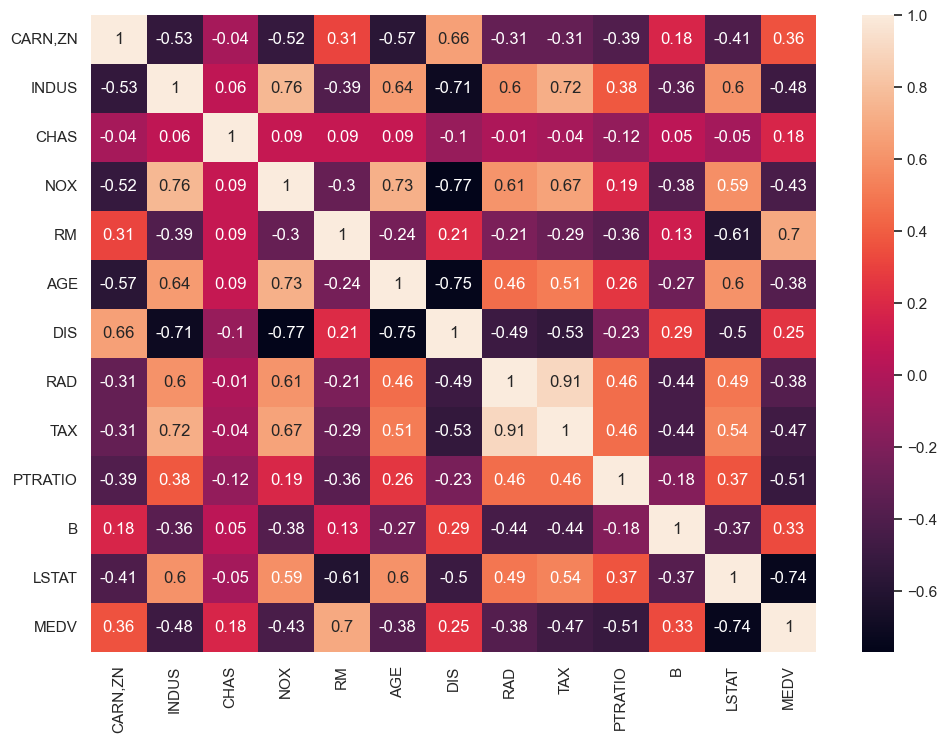

In [25]:
correlation_matrix=boston_data.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)

In [26]:
x = boston_data.iloc[:,:-1]
y = boston_data['MEDV']


In [29]:
x

,"CARN,ZN",INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [28]:
y

0.00632    24.0
0.02731    21.6
0.02729    34.7
0.03237    33.4
0.06905    36.2
           ... 
0.06263    22.4
0.04527    20.6
0.06076    23.9
0.10959    22.0
0.04741    11.9
Name: MEDV, Length: 506, dtype: float64

# LINEAR REGRESSION MODEL

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)


In [31]:
lin_model = LinearRegression()

In [32]:
lin_model.fit(x_train,y_train)
lin_model.predict(x_test)

array([37.49744316, 31.97160342, 27.12922831,  4.83396988, 35.36385403,
        7.21178202, 27.85838503, 31.79471288, 26.16471198, 21.78087704,
       32.04600976, 21.53645553, 23.74855451, 33.0275273 , 28.55351597,
       14.69008967,  0.23477854, 18.83868237, 13.18950396, 19.30956603,
        1.36616226, 19.85437563, 38.02130192, 24.25117293, 31.30413278,
       10.99117314, 25.16766848, 23.03128841, 22.82766994, 20.94671479,
       14.75602842,  6.47595746, 18.58621355, 21.9378906 , 28.63921192,
       19.18950535, 30.20216125,  8.83402631, 40.78549303, 34.56002496,
       20.34998367,  1.89653621, 29.84094993, 11.07945784, 27.37805357,
       30.78706885, -2.67251551, 19.7402414 , 21.07773421, 11.9332905 ,
       20.1712137 , 19.17872288, 23.70598882, 12.49914372, 17.26297254,
       25.31882446, 34.97236721, 14.18002207, 28.52779719, 21.07291138,
       20.09295168, 25.66168139, 14.53796404, 33.45021744, 22.83978307,
       14.71493433, 19.34571625, 24.87121109, 21.58093887, 21.31

In [34]:
cvs = cross_val_score(lin_model,x,y,scoring = "neg_mean_squared_error",cv = 10)

In [35]:
print(cvs)
mean_cvs = np.mean(cvs)
print(mean_cvs)

[  -9.52432734  -13.92778658  -14.74736416  -34.31939599  -31.68904388
  -19.75806217   -9.63537053 -157.4313788   -32.07035846  -11.61660669]
-33.471969459993396


ValueError: Expected 2D array, got 1D array instead:
array=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400 401 402 403].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

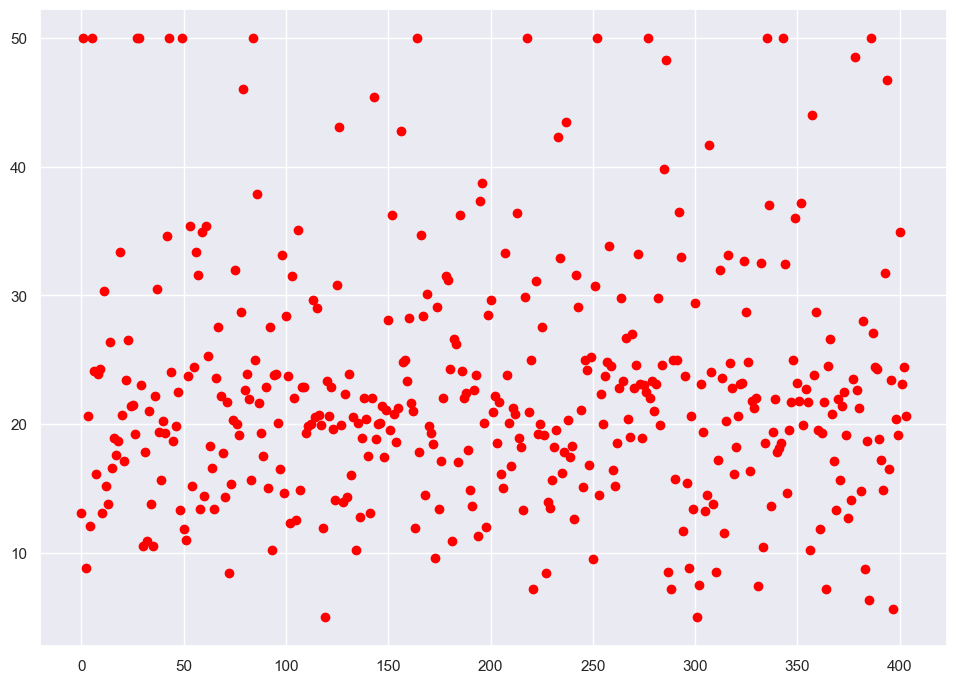

In [38]:
x_train1=np.arange(0,len(x_train),1)
plt.scatter(x_train1,y_train,color="red")
plt.plot(x_train1, lin_model.predict(x_train), color="green")
plt.title("Housing Prices(Traing Set)(Linear Model)")
plt.xlabel("Housing")
plt.ylabel("Price")
plt.show()

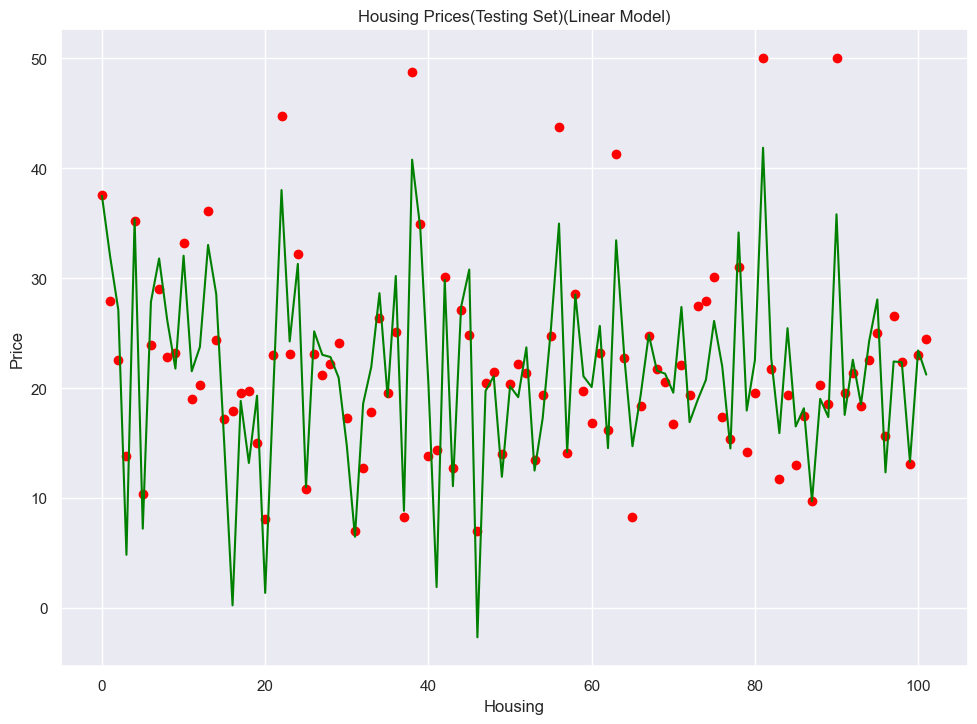

In [39]:
x_test1=np.arange(0,len(x_test),1)
plt.scatter(x_test1,y_test,color="red")
plt.plot(x_test1, lin_model.predict(x_test), color="green")
plt.title("Housing Prices(Testing Set)(Linear Model)")
plt.xlabel("Housing")
plt.ylabel("Price")
plt.show()

In [40]:
#ridge model
ridge=Ridge()
params={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}
ridge_model=GridSearchCV(ridge,params,scoring="neg_mean_squared_error",cv=10)

In [41]:
ridge_model.fit(x_train,y_train)
ridge_model.predict(x_test)

ValueError: 
All the 90 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py", line 1134, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[ 41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.
  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.
  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.
  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.
  97.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110.
 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124.
 125. 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138.
 139. 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152.
 153. 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166.
 167. 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180.
 181. 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194.
 195. 196. 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208.
 209. 210. 211. 212. 213. 214. 215. 216. 217. 218. 219. 220. 221. 222.
 223. 224. 225. 226. 227. 228. 229. 230. 231. 232. 233. 234. 235. 236.
 237. 238. 239. 240. 241. 242. 243. 244. 245. 246. 247. 248. 249. 250.
 251. 252. 253. 254. 255. 256. 257. 258. 259. 260. 261. 262. 263. 264.
 265. 266. 267. 268. 269. 270. 271. 272. 273. 274. 275. 276. 277. 278.
 279. 280. 281. 282. 283. 284. 285. 286. 287. 288. 289. 290. 291. 292.
 293. 294. 295. 296. 297. 298. 299. 300. 301. 302. 303. 304. 305. 306.
 307. 308. 309. 310. 311. 312. 313. 314. 315. 316. 317. 318. 319. 320.
 321. 322. 323. 324. 325. 326. 327. 328. 329. 330. 331. 332. 333. 334.
 335. 336. 337. 338. 339. 340. 341. 342. 343. 344. 345. 346. 347. 348.
 349. 350. 351. 352. 353. 354. 355. 356. 357. 358. 359. 360. 361. 362.
 363. 364. 365. 366. 367. 368. 369. 370. 371. 372. 373. 374. 375. 376.
 377. 378. 379. 380. 381. 382. 383. 384. 385. 386. 387. 388. 389. 390.
 391. 392. 393. 394. 395. 396. 397. 398. 399. 400. 401. 402. 403.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py", line 1134, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  82.
  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.
  97.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110.
 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124.
 125. 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138.
 139. 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152.
 153. 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166.
 167. 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180.
 181. 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194.
 195. 196. 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208.
 209. 210. 211. 212. 213. 214. 215. 216. 217. 218. 219. 220. 221. 222.
 223. 224. 225. 226. 227. 228. 229. 230. 231. 232. 233. 234. 235. 236.
 237. 238. 239. 240. 241. 242. 243. 244. 245. 246. 247. 248. 249. 250.
 251. 252. 253. 254. 255. 256. 257. 258. 259. 260. 261. 262. 263. 264.
 265. 266. 267. 268. 269. 270. 271. 272. 273. 274. 275. 276. 277. 278.
 279. 280. 281. 282. 283. 284. 285. 286. 287. 288. 289. 290. 291. 292.
 293. 294. 295. 296. 297. 298. 299. 300. 301. 302. 303. 304. 305. 306.
 307. 308. 309. 310. 311. 312. 313. 314. 315. 316. 317. 318. 319. 320.
 321. 322. 323. 324. 325. 326. 327. 328. 329. 330. 331. 332. 333. 334.
 335. 336. 337. 338. 339. 340. 341. 342. 343. 344. 345. 346. 347. 348.
 349. 350. 351. 352. 353. 354. 355. 356. 357. 358. 359. 360. 361. 362.
 363. 364. 365. 366. 367. 368. 369. 370. 371. 372. 373. 374. 375. 376.
 377. 378. 379. 380. 381. 382. 383. 384. 385. 386. 387. 388. 389. 390.
 391. 392. 393. 394. 395. 396. 397. 398. 399. 400. 401. 402. 403.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py", line 1134, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81. 123. 124.
 125. 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138.
 139. 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152.
 153. 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166.
 167. 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180.
 181. 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194.
 195. 196. 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208.
 209. 210. 211. 212. 213. 214. 215. 216. 217. 218. 219. 220. 221. 222.
 223. 224. 225. 226. 227. 228. 229. 230. 231. 232. 233. 234. 235. 236.
 237. 238. 239. 240. 241. 242. 243. 244. 245. 246. 247. 248. 249. 250.
 251. 252. 253. 254. 255. 256. 257. 258. 259. 260. 261. 262. 263. 264.
 265. 266. 267. 268. 269. 270. 271. 272. 273. 274. 275. 276. 277. 278.
 279. 280. 281. 282. 283. 284. 285. 286. 287. 288. 289. 290. 291. 292.
 293. 294. 295. 296. 297. 298. 299. 300. 301. 302. 303. 304. 305. 306.
 307. 308. 309. 310. 311. 312. 313. 314. 315. 316. 317. 318. 319. 320.
 321. 322. 323. 324. 325. 326. 327. 328. 329. 330. 331. 332. 333. 334.
 335. 336. 337. 338. 339. 340. 341. 342. 343. 344. 345. 346. 347. 348.
 349. 350. 351. 352. 353. 354. 355. 356. 357. 358. 359. 360. 361. 362.
 363. 364. 365. 366. 367. 368. 369. 370. 371. 372. 373. 374. 375. 376.
 377. 378. 379. 380. 381. 382. 383. 384. 385. 386. 387. 388. 389. 390.
 391. 392. 393. 394. 395. 396. 397. 398. 399. 400. 401. 402. 403.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py", line 1134, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 164. 165. 166.
 167. 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180.
 181. 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194.
 195. 196. 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208.
 209. 210. 211. 212. 213. 214. 215. 216. 217. 218. 219. 220. 221. 222.
 223. 224. 225. 226. 227. 228. 229. 230. 231. 232. 233. 234. 235. 236.
 237. 238. 239. 240. 241. 242. 243. 244. 245. 246. 247. 248. 249. 250.
 251. 252. 253. 254. 255. 256. 257. 258. 259. 260. 261. 262. 263. 264.
 265. 266. 267. 268. 269. 270. 271. 272. 273. 274. 275. 276. 277. 278.
 279. 280. 281. 282. 283. 284. 285. 286. 287. 288. 289. 290. 291. 292.
 293. 294. 295. 296. 297. 298. 299. 300. 301. 302. 303. 304. 305. 306.
 307. 308. 309. 310. 311. 312. 313. 314. 315. 316. 317. 318. 319. 320.
 321. 322. 323. 324. 325. 326. 327. 328. 329. 330. 331. 332. 333. 334.
 335. 336. 337. 338. 339. 340. 341. 342. 343. 344. 345. 346. 347. 348.
 349. 350. 351. 352. 353. 354. 355. 356. 357. 358. 359. 360. 361. 362.
 363. 364. 365. 366. 367. 368. 369. 370. 371. 372. 373. 374. 375. 376.
 377. 378. 379. 380. 381. 382. 383. 384. 385. 386. 387. 388. 389. 390.
 391. 392. 393. 394. 395. 396. 397. 398. 399. 400. 401. 402. 403.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py", line 1134, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 204. 205. 206. 207.
 208. 209. 210. 211. 212. 213. 214. 215. 216. 217. 218. 219. 220. 221.
 222. 223. 224. 225. 226. 227. 228. 229. 230. 231. 232. 233. 234. 235.
 236. 237. 238. 239. 240. 241. 242. 243. 244. 245. 246. 247. 248. 249.
 250. 251. 252. 253. 254. 255. 256. 257. 258. 259. 260. 261. 262. 263.
 264. 265. 266. 267. 268. 269. 270. 271. 272. 273. 274. 275. 276. 277.
 278. 279. 280. 281. 282. 283. 284. 285. 286. 287. 288. 289. 290. 291.
 292. 293. 294. 295. 296. 297. 298. 299. 300. 301. 302. 303. 304. 305.
 306. 307. 308. 309. 310. 311. 312. 313. 314. 315. 316. 317. 318. 319.
 320. 321. 322. 323. 324. 325. 326. 327. 328. 329. 330. 331. 332. 333.
 334. 335. 336. 337. 338. 339. 340. 341. 342. 343. 344. 345. 346. 347.
 348. 349. 350. 351. 352. 353. 354. 355. 356. 357. 358. 359. 360. 361.
 362. 363. 364. 365. 366. 367. 368. 369. 370. 371. 372. 373. 374. 375.
 376. 377. 378. 379. 380. 381. 382. 383. 384. 385. 386. 387. 388. 389.
 390. 391. 392. 393. 394. 395. 396. 397. 398. 399. 400. 401. 402. 403.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py", line 1134, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 197. 198. 199. 200. 201. 202. 203. 244. 245. 246. 247. 248. 249.
 250. 251. 252. 253. 254. 255. 256. 257. 258. 259. 260. 261. 262. 263.
 264. 265. 266. 267. 268. 269. 270. 271. 272. 273. 274. 275. 276. 277.
 278. 279. 280. 281. 282. 283. 284. 285. 286. 287. 288. 289. 290. 291.
 292. 293. 294. 295. 296. 297. 298. 299. 300. 301. 302. 303. 304. 305.
 306. 307. 308. 309. 310. 311. 312. 313. 314. 315. 316. 317. 318. 319.
 320. 321. 322. 323. 324. 325. 326. 327. 328. 329. 330. 331. 332. 333.
 334. 335. 336. 337. 338. 339. 340. 341. 342. 343. 344. 345. 346. 347.
 348. 349. 350. 351. 352. 353. 354. 355. 356. 357. 358. 359. 360. 361.
 362. 363. 364. 365. 366. 367. 368. 369. 370. 371. 372. 373. 374. 375.
 376. 377. 378. 379. 380. 381. 382. 383. 384. 385. 386. 387. 388. 389.
 390. 391. 392. 393. 394. 395. 396. 397. 398. 399. 400. 401. 402. 403.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py", line 1134, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208. 209.
 210. 211. 212. 213. 214. 215. 216. 217. 218. 219. 220. 221. 222. 223.
 224. 225. 226. 227. 228. 229. 230. 231. 232. 233. 234. 235. 236. 237.
 238. 239. 240. 241. 242. 243. 284. 285. 286. 287. 288. 289. 290. 291.
 292. 293. 294. 295. 296. 297. 298. 299. 300. 301. 302. 303. 304. 305.
 306. 307. 308. 309. 310. 311. 312. 313. 314. 315. 316. 317. 318. 319.
 320. 321. 322. 323. 324. 325. 326. 327. 328. 329. 330. 331. 332. 333.
 334. 335. 336. 337. 338. 339. 340. 341. 342. 343. 344. 345. 346. 347.
 348. 349. 350. 351. 352. 353. 354. 355. 356. 357. 358. 359. 360. 361.
 362. 363. 364. 365. 366. 367. 368. 369. 370. 371. 372. 373. 374. 375.
 376. 377. 378. 379. 380. 381. 382. 383. 384. 385. 386. 387. 388. 389.
 390. 391. 392. 393. 394. 395. 396. 397. 398. 399. 400. 401. 402. 403.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py", line 1134, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208. 209.
 210. 211. 212. 213. 214. 215. 216. 217. 218. 219. 220. 221. 222. 223.
 224. 225. 226. 227. 228. 229. 230. 231. 232. 233. 234. 235. 236. 237.
 238. 239. 240. 241. 242. 243. 244. 245. 246. 247. 248. 249. 250. 251.
 252. 253. 254. 255. 256. 257. 258. 259. 260. 261. 262. 263. 264. 265.
 266. 267. 268. 269. 270. 271. 272. 273. 274. 275. 276. 277. 278. 279.
 280. 281. 282. 283. 324. 325. 326. 327. 328. 329. 330. 331. 332. 333.
 334. 335. 336. 337. 338. 339. 340. 341. 342. 343. 344. 345. 346. 347.
 348. 349. 350. 351. 352. 353. 354. 355. 356. 357. 358. 359. 360. 361.
 362. 363. 364. 365. 366. 367. 368. 369. 370. 371. 372. 373. 374. 375.
 376. 377. 378. 379. 380. 381. 382. 383. 384. 385. 386. 387. 388. 389.
 390. 391. 392. 393. 394. 395. 396. 397. 398. 399. 400. 401. 402. 403.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py", line 1134, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208. 209.
 210. 211. 212. 213. 214. 215. 216. 217. 218. 219. 220. 221. 222. 223.
 224. 225. 226. 227. 228. 229. 230. 231. 232. 233. 234. 235. 236. 237.
 238. 239. 240. 241. 242. 243. 244. 245. 246. 247. 248. 249. 250. 251.
 252. 253. 254. 255. 256. 257. 258. 259. 260. 261. 262. 263. 264. 265.
 266. 267. 268. 269. 270. 271. 272. 273. 274. 275. 276. 277. 278. 279.
 280. 281. 282. 283. 284. 285. 286. 287. 288. 289. 290. 291. 292. 293.
 294. 295. 296. 297. 298. 299. 300. 301. 302. 303. 304. 305. 306. 307.
 308. 309. 310. 311. 312. 313. 314. 315. 316. 317. 318. 319. 320. 321.
 322. 323. 364. 365. 366. 367. 368. 369. 370. 371. 372. 373. 374. 375.
 376. 377. 378. 379. 380. 381. 382. 383. 384. 385. 386. 387. 388. 389.
 390. 391. 392. 393. 394. 395. 396. 397. 398. 399. 400. 401. 402. 403.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py", line 1134, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208. 209.
 210. 211. 212. 213. 214. 215. 216. 217. 218. 219. 220. 221. 222. 223.
 224. 225. 226. 227. 228. 229. 230. 231. 232. 233. 234. 235. 236. 237.
 238. 239. 240. 241. 242. 243. 244. 245. 246. 247. 248. 249. 250. 251.
 252. 253. 254. 255. 256. 257. 258. 259. 260. 261. 262. 263. 264. 265.
 266. 267. 268. 269. 270. 271. 272. 273. 274. 275. 276. 277. 278. 279.
 280. 281. 282. 283. 284. 285. 286. 287. 288. 289. 290. 291. 292. 293.
 294. 295. 296. 297. 298. 299. 300. 301. 302. 303. 304. 305. 306. 307.
 308. 309. 310. 311. 312. 313. 314. 315. 316. 317. 318. 319. 320. 321.
 322. 323. 324. 325. 326. 327. 328. 329. 330. 331. 332. 333. 334. 335.
 336. 337. 338. 339. 340. 341. 342. 343. 344. 345. 346. 347. 348. 349.
 350. 351. 352. 353. 354. 355. 356. 357. 358. 359. 360. 361. 362. 363.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


In [42]:
print(ridge_model.best_params_)
print(ridge_model.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

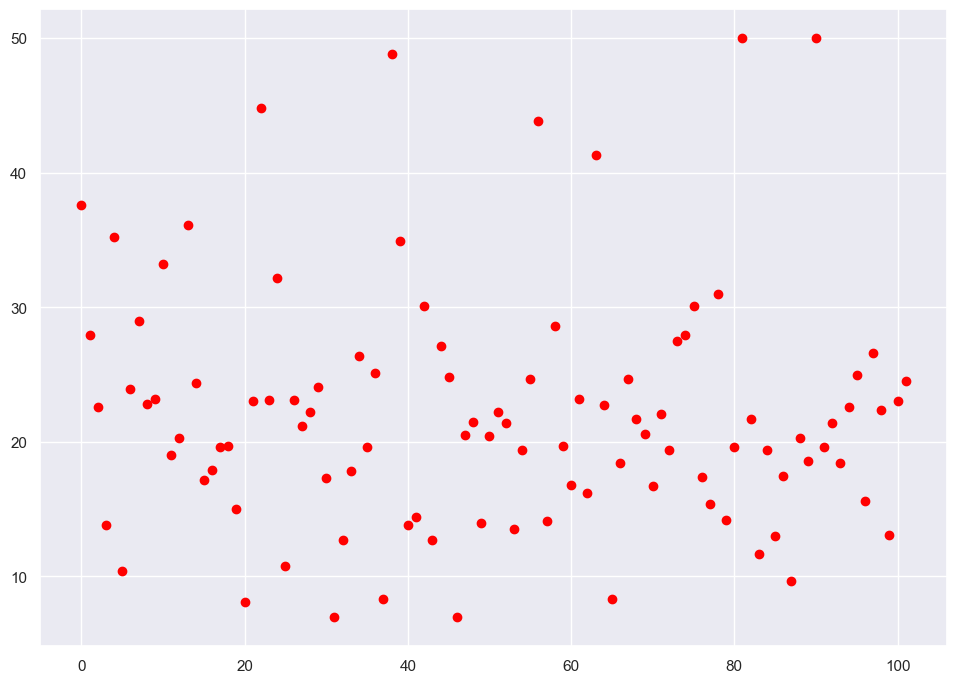

In [43]:
x_test1=np.arange(0,len(x_test),1)
plt.scatter(x_test1,y_test,color="red")
plt.plot(x_test1, ridge_model.predict(x_test), color="green")
plt.title("Housing Prices(Testing Set)(ridge Model)")
plt.xlabel("Housing")
plt.ylabel("Price")
plt.show()

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

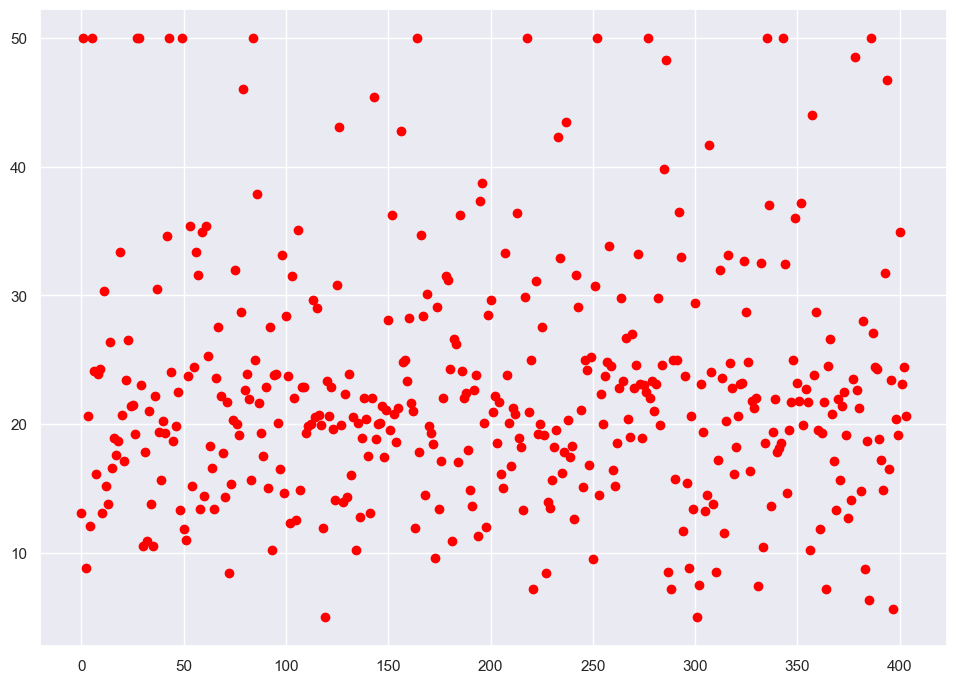

In [44]:
x_train1=np.arange(0,len(x_train),1)
plt.scatter(x_train1,y_train,color="red")
plt.plot(x_train1, ridge_model.predict(x_train), color="green")
plt.title("Housing Prices(Training Set)(ridge Model)")
plt.xlabel("Housing")
plt.ylabel("Price")
plt.show()

In [46]:
#lasso model
lasso = Lasso()
params = {"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}
lasso_model = GridSearchCV(lasso,params,scoring = "neg_mean_squared_error",cv=10)

In [47]:
lasso_model.fit(x_train,y_train)
lasso_model.predict(x_test)

ValueError: 
All the 90 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 905, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[ 41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.
  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.
  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.
  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.
  97.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110.
 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124.
 125. 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138.
 139. 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152.
 153. 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166.
 167. 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180.
 181. 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194.
 195. 196. 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208.
 209. 210. 211. 212. 213. 214. 215. 216. 217. 218. 219. 220. 221. 222.
 223. 224. 225. 226. 227. 228. 229. 230. 231. 232. 233. 234. 235. 236.
 237. 238. 239. 240. 241. 242. 243. 244. 245. 246. 247. 248. 249. 250.
 251. 252. 253. 254. 255. 256. 257. 258. 259. 260. 261. 262. 263. 264.
 265. 266. 267. 268. 269. 270. 271. 272. 273. 274. 275. 276. 277. 278.
 279. 280. 281. 282. 283. 284. 285. 286. 287. 288. 289. 290. 291. 292.
 293. 294. 295. 296. 297. 298. 299. 300. 301. 302. 303. 304. 305. 306.
 307. 308. 309. 310. 311. 312. 313. 314. 315. 316. 317. 318. 319. 320.
 321. 322. 323. 324. 325. 326. 327. 328. 329. 330. 331. 332. 333. 334.
 335. 336. 337. 338. 339. 340. 341. 342. 343. 344. 345. 346. 347. 348.
 349. 350. 351. 352. 353. 354. 355. 356. 357. 358. 359. 360. 361. 362.
 363. 364. 365. 366. 367. 368. 369. 370. 371. 372. 373. 374. 375. 376.
 377. 378. 379. 380. 381. 382. 383. 384. 385. 386. 387. 388. 389. 390.
 391. 392. 393. 394. 395. 396. 397. 398. 399. 400. 401. 402. 403.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 905, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  82.
  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.
  97.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110.
 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124.
 125. 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138.
 139. 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152.
 153. 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166.
 167. 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180.
 181. 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194.
 195. 196. 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208.
 209. 210. 211. 212. 213. 214. 215. 216. 217. 218. 219. 220. 221. 222.
 223. 224. 225. 226. 227. 228. 229. 230. 231. 232. 233. 234. 235. 236.
 237. 238. 239. 240. 241. 242. 243. 244. 245. 246. 247. 248. 249. 250.
 251. 252. 253. 254. 255. 256. 257. 258. 259. 260. 261. 262. 263. 264.
 265. 266. 267. 268. 269. 270. 271. 272. 273. 274. 275. 276. 277. 278.
 279. 280. 281. 282. 283. 284. 285. 286. 287. 288. 289. 290. 291. 292.
 293. 294. 295. 296. 297. 298. 299. 300. 301. 302. 303. 304. 305. 306.
 307. 308. 309. 310. 311. 312. 313. 314. 315. 316. 317. 318. 319. 320.
 321. 322. 323. 324. 325. 326. 327. 328. 329. 330. 331. 332. 333. 334.
 335. 336. 337. 338. 339. 340. 341. 342. 343. 344. 345. 346. 347. 348.
 349. 350. 351. 352. 353. 354. 355. 356. 357. 358. 359. 360. 361. 362.
 363. 364. 365. 366. 367. 368. 369. 370. 371. 372. 373. 374. 375. 376.
 377. 378. 379. 380. 381. 382. 383. 384. 385. 386. 387. 388. 389. 390.
 391. 392. 393. 394. 395. 396. 397. 398. 399. 400. 401. 402. 403.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 905, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81. 123. 124.
 125. 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138.
 139. 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152.
 153. 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166.
 167. 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180.
 181. 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194.
 195. 196. 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208.
 209. 210. 211. 212. 213. 214. 215. 216. 217. 218. 219. 220. 221. 222.
 223. 224. 225. 226. 227. 228. 229. 230. 231. 232. 233. 234. 235. 236.
 237. 238. 239. 240. 241. 242. 243. 244. 245. 246. 247. 248. 249. 250.
 251. 252. 253. 254. 255. 256. 257. 258. 259. 260. 261. 262. 263. 264.
 265. 266. 267. 268. 269. 270. 271. 272. 273. 274. 275. 276. 277. 278.
 279. 280. 281. 282. 283. 284. 285. 286. 287. 288. 289. 290. 291. 292.
 293. 294. 295. 296. 297. 298. 299. 300. 301. 302. 303. 304. 305. 306.
 307. 308. 309. 310. 311. 312. 313. 314. 315. 316. 317. 318. 319. 320.
 321. 322. 323. 324. 325. 326. 327. 328. 329. 330. 331. 332. 333. 334.
 335. 336. 337. 338. 339. 340. 341. 342. 343. 344. 345. 346. 347. 348.
 349. 350. 351. 352. 353. 354. 355. 356. 357. 358. 359. 360. 361. 362.
 363. 364. 365. 366. 367. 368. 369. 370. 371. 372. 373. 374. 375. 376.
 377. 378. 379. 380. 381. 382. 383. 384. 385. 386. 387. 388. 389. 390.
 391. 392. 393. 394. 395. 396. 397. 398. 399. 400. 401. 402. 403.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 905, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 164. 165. 166.
 167. 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180.
 181. 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194.
 195. 196. 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208.
 209. 210. 211. 212. 213. 214. 215. 216. 217. 218. 219. 220. 221. 222.
 223. 224. 225. 226. 227. 228. 229. 230. 231. 232. 233. 234. 235. 236.
 237. 238. 239. 240. 241. 242. 243. 244. 245. 246. 247. 248. 249. 250.
 251. 252. 253. 254. 255. 256. 257. 258. 259. 260. 261. 262. 263. 264.
 265. 266. 267. 268. 269. 270. 271. 272. 273. 274. 275. 276. 277. 278.
 279. 280. 281. 282. 283. 284. 285. 286. 287. 288. 289. 290. 291. 292.
 293. 294. 295. 296. 297. 298. 299. 300. 301. 302. 303. 304. 305. 306.
 307. 308. 309. 310. 311. 312. 313. 314. 315. 316. 317. 318. 319. 320.
 321. 322. 323. 324. 325. 326. 327. 328. 329. 330. 331. 332. 333. 334.
 335. 336. 337. 338. 339. 340. 341. 342. 343. 344. 345. 346. 347. 348.
 349. 350. 351. 352. 353. 354. 355. 356. 357. 358. 359. 360. 361. 362.
 363. 364. 365. 366. 367. 368. 369. 370. 371. 372. 373. 374. 375. 376.
 377. 378. 379. 380. 381. 382. 383. 384. 385. 386. 387. 388. 389. 390.
 391. 392. 393. 394. 395. 396. 397. 398. 399. 400. 401. 402. 403.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 905, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 204. 205. 206. 207.
 208. 209. 210. 211. 212. 213. 214. 215. 216. 217. 218. 219. 220. 221.
 222. 223. 224. 225. 226. 227. 228. 229. 230. 231. 232. 233. 234. 235.
 236. 237. 238. 239. 240. 241. 242. 243. 244. 245. 246. 247. 248. 249.
 250. 251. 252. 253. 254. 255. 256. 257. 258. 259. 260. 261. 262. 263.
 264. 265. 266. 267. 268. 269. 270. 271. 272. 273. 274. 275. 276. 277.
 278. 279. 280. 281. 282. 283. 284. 285. 286. 287. 288. 289. 290. 291.
 292. 293. 294. 295. 296. 297. 298. 299. 300. 301. 302. 303. 304. 305.
 306. 307. 308. 309. 310. 311. 312. 313. 314. 315. 316. 317. 318. 319.
 320. 321. 322. 323. 324. 325. 326. 327. 328. 329. 330. 331. 332. 333.
 334. 335. 336. 337. 338. 339. 340. 341. 342. 343. 344. 345. 346. 347.
 348. 349. 350. 351. 352. 353. 354. 355. 356. 357. 358. 359. 360. 361.
 362. 363. 364. 365. 366. 367. 368. 369. 370. 371. 372. 373. 374. 375.
 376. 377. 378. 379. 380. 381. 382. 383. 384. 385. 386. 387. 388. 389.
 390. 391. 392. 393. 394. 395. 396. 397. 398. 399. 400. 401. 402. 403.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 905, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 197. 198. 199. 200. 201. 202. 203. 244. 245. 246. 247. 248. 249.
 250. 251. 252. 253. 254. 255. 256. 257. 258. 259. 260. 261. 262. 263.
 264. 265. 266. 267. 268. 269. 270. 271. 272. 273. 274. 275. 276. 277.
 278. 279. 280. 281. 282. 283. 284. 285. 286. 287. 288. 289. 290. 291.
 292. 293. 294. 295. 296. 297. 298. 299. 300. 301. 302. 303. 304. 305.
 306. 307. 308. 309. 310. 311. 312. 313. 314. 315. 316. 317. 318. 319.
 320. 321. 322. 323. 324. 325. 326. 327. 328. 329. 330. 331. 332. 333.
 334. 335. 336. 337. 338. 339. 340. 341. 342. 343. 344. 345. 346. 347.
 348. 349. 350. 351. 352. 353. 354. 355. 356. 357. 358. 359. 360. 361.
 362. 363. 364. 365. 366. 367. 368. 369. 370. 371. 372. 373. 374. 375.
 376. 377. 378. 379. 380. 381. 382. 383. 384. 385. 386. 387. 388. 389.
 390. 391. 392. 393. 394. 395. 396. 397. 398. 399. 400. 401. 402. 403.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 905, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208. 209.
 210. 211. 212. 213. 214. 215. 216. 217. 218. 219. 220. 221. 222. 223.
 224. 225. 226. 227. 228. 229. 230. 231. 232. 233. 234. 235. 236. 237.
 238. 239. 240. 241. 242. 243. 284. 285. 286. 287. 288. 289. 290. 291.
 292. 293. 294. 295. 296. 297. 298. 299. 300. 301. 302. 303. 304. 305.
 306. 307. 308. 309. 310. 311. 312. 313. 314. 315. 316. 317. 318. 319.
 320. 321. 322. 323. 324. 325. 326. 327. 328. 329. 330. 331. 332. 333.
 334. 335. 336. 337. 338. 339. 340. 341. 342. 343. 344. 345. 346. 347.
 348. 349. 350. 351. 352. 353. 354. 355. 356. 357. 358. 359. 360. 361.
 362. 363. 364. 365. 366. 367. 368. 369. 370. 371. 372. 373. 374. 375.
 376. 377. 378. 379. 380. 381. 382. 383. 384. 385. 386. 387. 388. 389.
 390. 391. 392. 393. 394. 395. 396. 397. 398. 399. 400. 401. 402. 403.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 905, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208. 209.
 210. 211. 212. 213. 214. 215. 216. 217. 218. 219. 220. 221. 222. 223.
 224. 225. 226. 227. 228. 229. 230. 231. 232. 233. 234. 235. 236. 237.
 238. 239. 240. 241. 242. 243. 244. 245. 246. 247. 248. 249. 250. 251.
 252. 253. 254. 255. 256. 257. 258. 259. 260. 261. 262. 263. 264. 265.
 266. 267. 268. 269. 270. 271. 272. 273. 274. 275. 276. 277. 278. 279.
 280. 281. 282. 283. 324. 325. 326. 327. 328. 329. 330. 331. 332. 333.
 334. 335. 336. 337. 338. 339. 340. 341. 342. 343. 344. 345. 346. 347.
 348. 349. 350. 351. 352. 353. 354. 355. 356. 357. 358. 359. 360. 361.
 362. 363. 364. 365. 366. 367. 368. 369. 370. 371. 372. 373. 374. 375.
 376. 377. 378. 379. 380. 381. 382. 383. 384. 385. 386. 387. 388. 389.
 390. 391. 392. 393. 394. 395. 396. 397. 398. 399. 400. 401. 402. 403.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 905, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208. 209.
 210. 211. 212. 213. 214. 215. 216. 217. 218. 219. 220. 221. 222. 223.
 224. 225. 226. 227. 228. 229. 230. 231. 232. 233. 234. 235. 236. 237.
 238. 239. 240. 241. 242. 243. 244. 245. 246. 247. 248. 249. 250. 251.
 252. 253. 254. 255. 256. 257. 258. 259. 260. 261. 262. 263. 264. 265.
 266. 267. 268. 269. 270. 271. 272. 273. 274. 275. 276. 277. 278. 279.
 280. 281. 282. 283. 284. 285. 286. 287. 288. 289. 290. 291. 292. 293.
 294. 295. 296. 297. 298. 299. 300. 301. 302. 303. 304. 305. 306. 307.
 308. 309. 310. 311. 312. 313. 314. 315. 316. 317. 318. 319. 320. 321.
 322. 323. 364. 365. 366. 367. 368. 369. 370. 371. 372. 373. 374. 375.
 376. 377. 378. 379. 380. 381. 382. 383. 384. 385. 386. 387. 388. 389.
 390. 391. 392. 393. 394. 395. 396. 397. 398. 399. 400. 401. 402. 403.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 905, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208. 209.
 210. 211. 212. 213. 214. 215. 216. 217. 218. 219. 220. 221. 222. 223.
 224. 225. 226. 227. 228. 229. 230. 231. 232. 233. 234. 235. 236. 237.
 238. 239. 240. 241. 242. 243. 244. 245. 246. 247. 248. 249. 250. 251.
 252. 253. 254. 255. 256. 257. 258. 259. 260. 261. 262. 263. 264. 265.
 266. 267. 268. 269. 270. 271. 272. 273. 274. 275. 276. 277. 278. 279.
 280. 281. 282. 283. 284. 285. 286. 287. 288. 289. 290. 291. 292. 293.
 294. 295. 296. 297. 298. 299. 300. 301. 302. 303. 304. 305. 306. 307.
 308. 309. 310. 311. 312. 313. 314. 315. 316. 317. 318. 319. 320. 321.
 322. 323. 324. 325. 326. 327. 328. 329. 330. 331. 332. 333. 334. 335.
 336. 337. 338. 339. 340. 341. 342. 343. 344. 345. 346. 347. 348. 349.
 350. 351. 352. 353. 354. 355. 356. 357. 358. 359. 360. 361. 362. 363.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

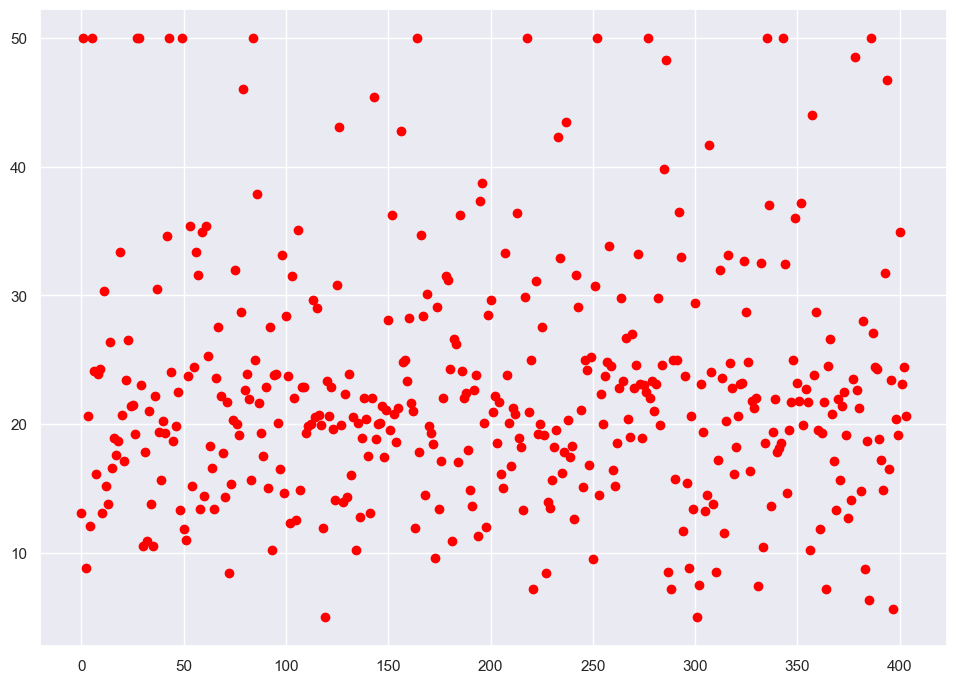

In [48]:
x_train1 = np.arange(0,len(x_train),1)
plt.scatter(x_train1,y_train,color = "red")
plt.plot(x_train1,lasso_model.predict(x_train),color = "green")
plt.title("Housing Prices(Training Set)(Lasso Model)")
plt.xlabel("Housing")
plt.ylabel("Price")
plt.show()

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

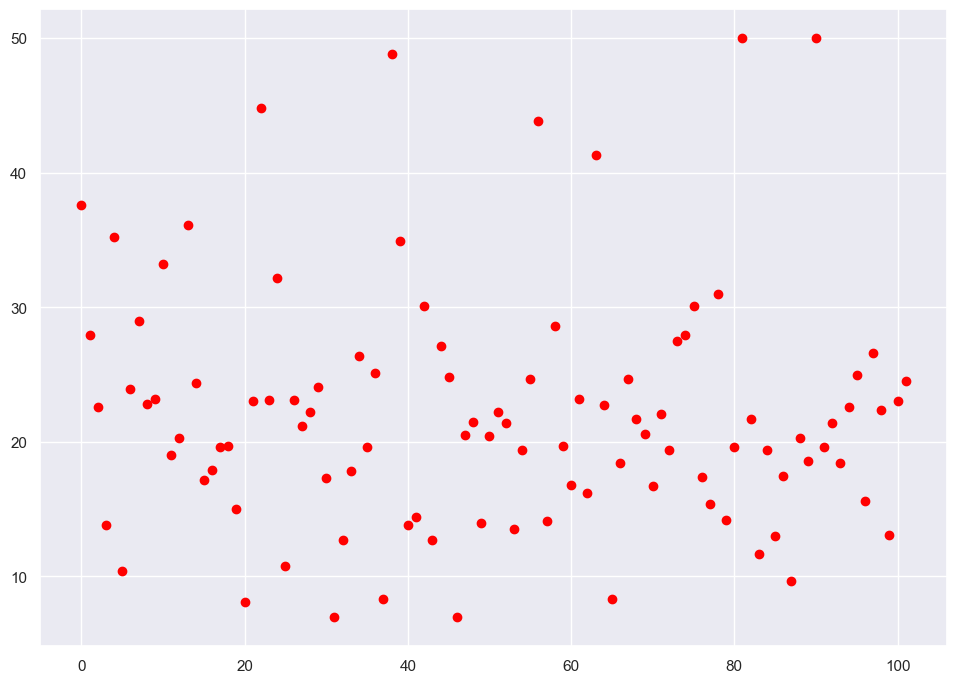

In [49]:
x_test1 = np.arange(0,len(x_test),1)
plt.scatter(x_test1,y_test,color = "red")
plt.plot(x_test1,lasso_model.predict(x_test),color = "green")
plt.title("Housing Prices(Testing Set)(Lasso Model)")
plt.xlabel("Housing")
plt.ylabel("Price")
plt.show()

In [50]:
elastic_net = ElasticNet()
params = {"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}
Elastic_net_model = GridSearchCV(elastic_net,params,scoring = "neg_mean_squared_error",cv=10

SyntaxError: incomplete input (3764996342.py, line 3)

In [51]:
Elastic_net_model.fit(x_train,y_train)
Elastic_net_model.predict(x_test)

NameError: name 'Elastic_net_model' is not defined

NameError: name 'Elastic_net_model' is not defined

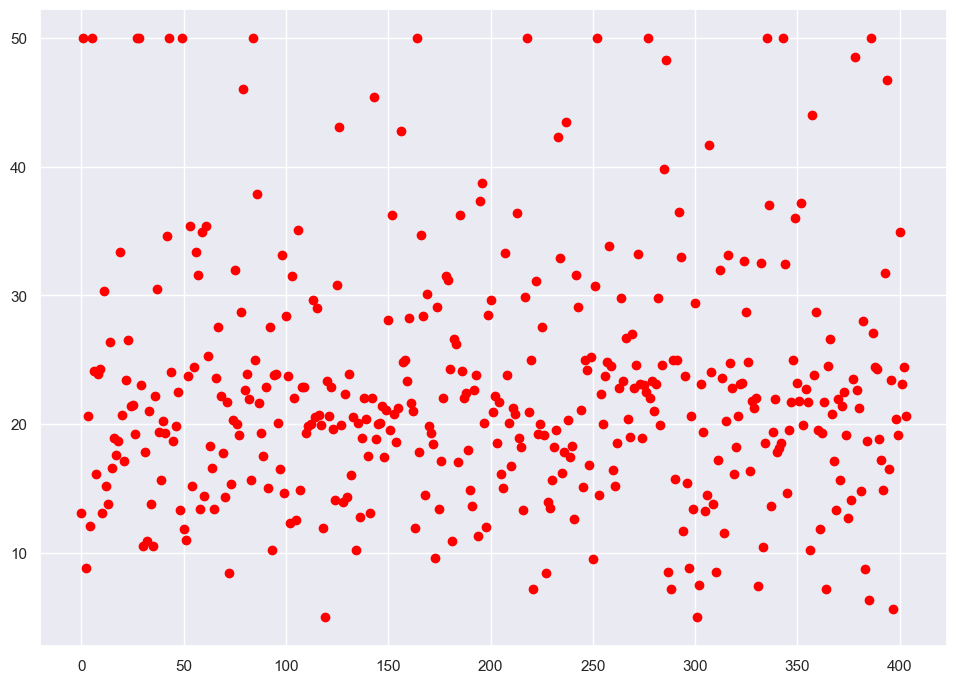

In [52]:
x_train1 = np.arange(0,len(x_train),1)
plt.scatter(x_train1,y_train,color = "red")
plt.plot(x_train1,Elastic_net_model.predict(x_train),color = "green")
plt.title("Housing Prices(Training Set)(Elastic Net Model)")
plt.xlabel("Housing")
plt.ylabel("Price")
plt.show()

NameError: name 'Elastic_net_model' is not defined

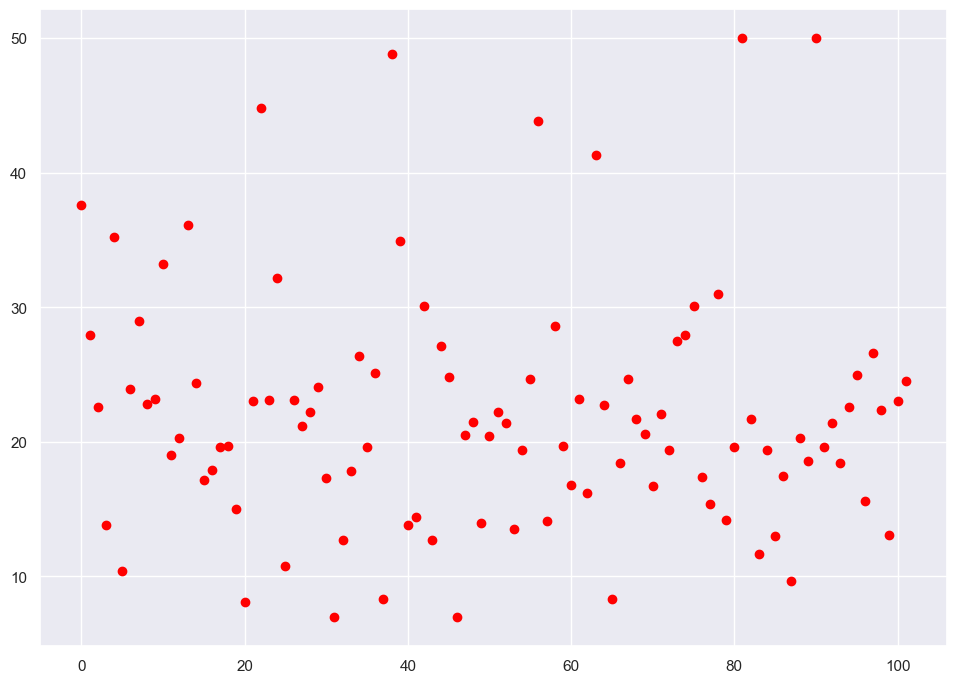

In [53]:
x_test1 = np.arange(0,len(x_test),1)
plt.scatter(x_test1,y_test,color = "red")
plt.plot(x_test1,Elastic_net_model.predict(x_test),color = "green")
plt.title("Housing Prices(Testing Set)(Elastic Net Model)")
plt.xlabel("Housing")
plt.ylabel("Price")
plt.show()
